In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from nn import Network, Neuron, Connection
from copy import deepcopy

In [13]:
x = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [   0.,       1.,       1.,       0.]
# TODO: we can generate more data (4 quadrants...)

In [14]:
def fitness(network):
    """Propagate our feature vectors through the network, get the prediction and
    measure the MSE"""
    return sum([(network.forward_pass(feature_vector)[0] - label) ** 2 for feature_vector, label in zip(x, y)])

def connection_weight_mutate(network, sigma=0.1):
    """Take a random connection from the network and add noise to the weight"""
    rand_conn = np.random.choice(network.connections)
    rand_conn.weight += np.random.normal(0, sigma)
    
def introduce_connection(network, sigma=0.5):
    """Take two random neurons and introduce a connection with random weight"""
    rand_node1 = np.random.choice(list(set(network.neurons) - set(network.outputs)))
    rand_node2 = np.random.choice(list(set(network.neurons) - set(network.inputs)))
    if network.adjacency[rand_node1][rand_node2] is None:
        network.add_connection(Connection(rand_node1, rand_node2, np.random.normal(0, sigma)))
    else:
        network.adjacency[rand_node1][rand_node2].enabled = True
    
    # TODO: check if we do not create a cycle!!!

def introduce_node(network, sigma=1):
    """Take a random connection from the network (A -> B) and introduce a new node
    C with connections: A -> C -> B"""
    # Take a random connection and disable it, we are introducing two new ones
    rand_conn = np.random.choice(network.connections)
    rand_conn.enabled = False
    
    # Create a new neuron
    new_neuron = Neuron(len(network.neurons) + 1)
    network.add_neuron(new_neuron)
    
    # Create two new connections
    new_conn1 = Connection(rand_conn.neuron_from, new_neuron, 1)
    # Take the weight of the disabled connection
    new_conn2 = Connection(new_neuron, rand_conn.neuron_to, rand_conn.weight)
    network.add_connection(new_conn1)
    network.add_connection(new_conn2)
    
def flip_connection(network):
    """Take a random connection and flip the enabled state"""
    rand_conn = np.random.choice(network.connections)
    if rand_conn.enabled:
        rand_conn.enabled = False
    else:
        if not network.check_cycle(rand_conn):
            rand_conn.enabled = True
            
    rand_conn.enabled = not rand_conn.enabled
    
def change_activation(network):
    """Take a random neuron and change its activation function"""
    rand_node = np.random.choice(network.neurons)
    rand_act_function = np.random.choice(list(Neuron.activation_functions.keys()))
    rand_node.activation_function = Neuron.activation_functions[rand_act_function]
    
def cross_over(network1, network2):
    pass

In [15]:
# Create two networks and test if deep copy is working
inputs = [Neuron(1), Neuron(2)]
outputs = [Neuron(3)]
connections = []

network1 = Network(inputs, outputs, connections)
network2 = deepcopy(network1)

network1.inputs.append(Neuron(6))
print([x.name for x in network1.inputs])
print([x.name for x in network2.inputs])

network1.outputs.append(Neuron(4))
print([x.name for x in network1.outputs])
print([x.name for x in network2.outputs])

network1.connections.append(Connection(Neuron(6), Neuron(4), 1))
print(len(network1.connections))
print(len(network2.connections))

# Restore our networks again
inputs = [Neuron(1), Neuron(2)]
outputs = [Neuron(3)]
connections = []

network1 = Network(inputs, outputs, connections)
network2 = deepcopy(network1)

[1, 2, 6]
[1, 2]
[3, 4]
[3]
1
0


2.4427179186837567
1.97350840241
2 2


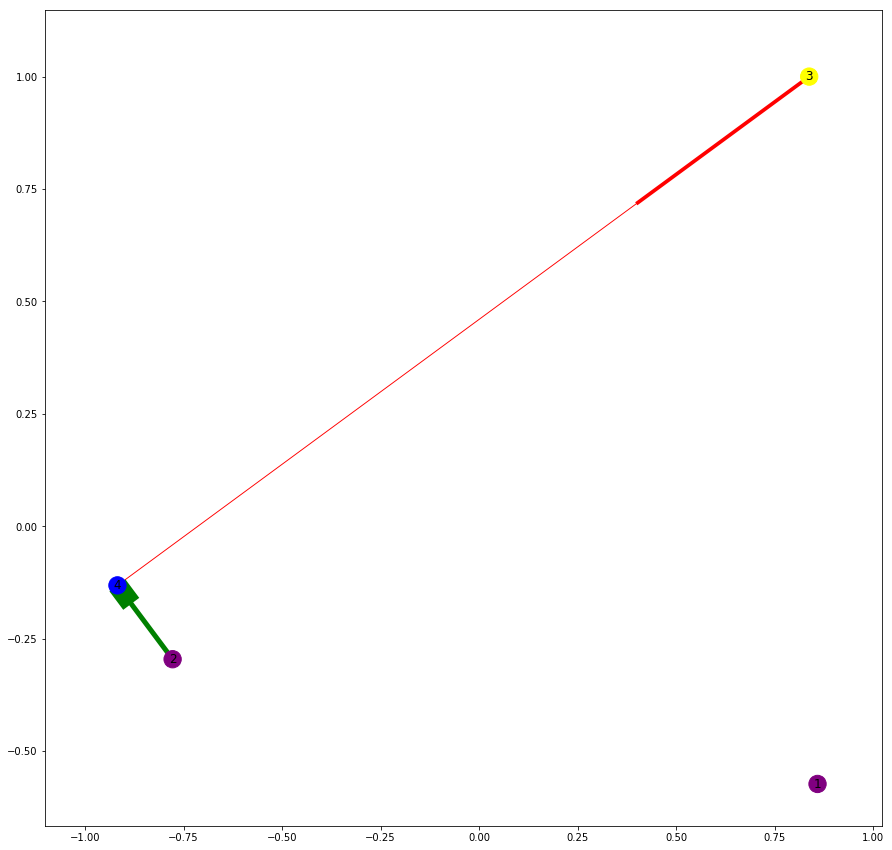

6 6


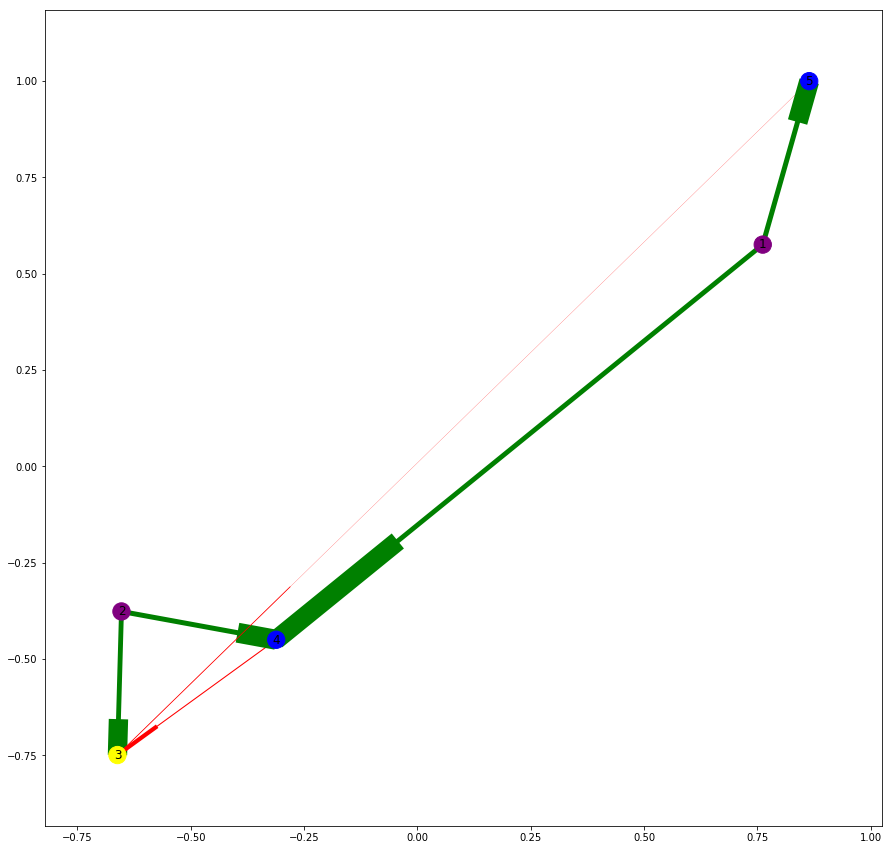

2 --> 3
enabled=False
weight=-0.18655586760428913
innovation=0
--------------------------------------------------
2 --> 4
enabled=True
weight=1
innovation=3
--------------------------------------------------
4 --> 3
enabled=True
weight=-0.18655586760428913
innovation=4
--------------------------------------------------
2 --> 3
enabled=True
weight=0.9678466063297376
innovation=1
--------------------------------------------------
1 --> 3
enabled=False
weight=-0.21100508684480454
innovation=2
--------------------------------------------------
2 --> 4
enabled=True
weight=1
innovation=5
--------------------------------------------------
4 --> 3
enabled=True
weight=0.9678466063297376
innovation=6
--------------------------------------------------
1 --> 5
enabled=True
weight=1
innovation=7
--------------------------------------------------
5 --> 3
enabled=True
weight=-0.21100508684480454
innovation=8
--------------------------------------------------
1 --> 4
enabled=True
weight=-0.03794783496

In [16]:
introduce_connection(network1)
introduce_connection(network2)
introduce_connection(network2)

introduce_node(network1)
introduce_node(network2)
introduce_node(network2)

introduce_connection(network1)
introduce_connection(network1)
introduce_connection(network2)
introduce_connection(network2)
introduce_connection(network2)
introduce_connection(network2)

flip_connection(network2)
change_activation(network2)
change_activation(network2)
change_activation(network2)

print(fitness(network1))
print(fitness(network2))

network1.visualize()
network2.visualize()

network1.genome_str()
network2.genome_str()